In [49]:
%matplotlib notebook
%matplotlib inline
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import os
print(os.getcwd())
myloc = str(os.getcwd)
print(type(myloc))

ale_ubuntu_path = str("/home/ubuntu/Desktop/lab2/WASP-44/MAST_2021-11-29T0310/TESS/tess2018263035959-s0003-0000000012862099-0123-s")
ale_windows_path = str("")

c:\Users\User\Desktop\UniPD\V anno\Laboratory 2\wasp-44\shared\notebooks
<class 'str'>


In [50]:
#sector3_tpf= ale_ubuntu_path + "/tess2018263035959-s0003-0000000012862099-0123-s_tp.fits"
sector3_tpf = "../../MAST/tess2018263035959-s0003-0000000012862099-0123-s_tp.fits"

In [51]:
fits.info(sector3_tpf)

Filename: ../MAST/tess2018263035959-s0003-0000000012862099-0123-s_tp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   19692R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [52]:
tp_read = fits.open(sector3_tpf)

In [53]:
print(tp_read)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000015E4BC78C40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000015E4BD6F400>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000015E4752D550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000015E4BA266D0>]


In [54]:
tp_read[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

The above cell shows that time is given in bjd coordinates minus a given constant, we'll have to convert time back to bjd to match taste data

(19692, 11, 11)


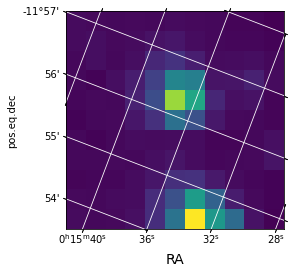

In [55]:
#plot the first image
tpf_data = tp_read[1].data
#print(tpf_data["flux"])
print(np.shape(tpf_data["flux"]))

wcs = WCS(tp_read[2].header)

fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(tpf_data["flux"][0], origin = "lower")
plt.grid(axis="both", color="white", ls="solid")
plt.xlabel("RA", fontsize=14)
plt.show()

In [56]:
print(tpf_data["TIME"][:10])

[1382.04024484 1382.04163374 1382.04302264 1382.04441153 1382.04580043
 1382.04718933 1382.04857822 1382.04996712 1382.05135602 1382.05274492]


In [57]:
#let's convert them in bjd
time = tpf_data["TIME"] + 2457000.0


In [58]:
tpf_head = tp_read[1].header
bjdref = tpf_head["BJDREFI"] + tpf_head["BJDREFF"]
#print(tpf_head)
#print(tpf_head["TTYPE2"])
print(bjdref)

2457000.0


In [59]:
print(time)

[2458382.04024484 2458382.04163374 2458382.04302264 ... 2458409.38547555
 2458409.38686438 2458409.38825322]


In [60]:
tp_read[1].columns
# we're going to work on flux, bkg flux and the quality factor

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

In [61]:
time_bjd = tp_read[1].data["TIME"] + bjdref
raw_counts = tp_read[1].data["RAW_CNTS"]
calibrated_frames = tp_read[1].data["FLUX"]
calibrated_frames_err = tp_read[1].data["FLUX_ERR"]

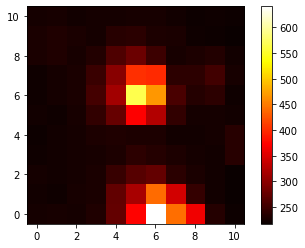

In [62]:
fig, ax = plt.subplots()
cax = ax.imshow(calibrated_frames[1,:,:], cmap = plt.cm.hot, origin="lower")
cbar = fig.colorbar(cax)
plt.show()

In [63]:
# now it's time to select aperture. This is not exactly chosen by us, since in the case of Kepler or TESS
# it is already defined by the science team

ap_image = tp_read[2].data
print(ap_image)

# we want to correct for the response of each pixel
# according to the properties of a pixel, we can mask some of them, so that we employ some for a certain purpose and 
# rule others out for other things

[[257 257 257 257 257 257 257 257 257 257 257]
 [257 257 257 257 257 257 257 257 257 257 257]
 [257 257 261 257 257 257 257 257 257 261 257]
 [257 261 261 257 257 257 257 257 261 257 257]
 [257 261 261 257 257 257 257 257 261 261 257]
 [257 261 261 257 257 267 267 257 261 261 257]
 [257 261 257 257 267 267 267 257 257 257 257]
 [257 261 261 257 257 267 267 257 257 257 257]
 [257 257 257 257 257 257 257 257 257 257 257]
 [257 257 257 261 257 257 257 261 261 261 257]
 [257 257 261 261 261 261 261 261 261 261 257]]


In [64]:
# let's write down the binary representation of the numbers we need
bits = np.binary_repr(267)
print(bits)

bits = np.binary_repr(257)
print(bits)

100001011
100000001


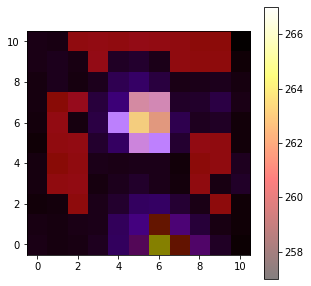

In [65]:
fig, ax = plt.subplots(figsize=(5,5))
cax = ax.imshow(calibrated_frames[0,:,:], cmap = plt.cm.gnuplot, origin="lower")
cbx = ax.imshow(ap_image, cmap=plt.cm.hot, origin="lower", alpha=0.5)
cbar = fig.colorbar(cbx)
plt.show()

lighter cells are used for the flux, red ones for bkg only


Now we are ready for aperture photometry

In [66]:
# the following command compares entries of ap_image with the number 2
ap_wanet = np.bitwise_and(ap_image, 2)
print(ap_wanet)

# here we have 2 wherever there was 267, since the binary representation corresponds at the powers 1 and 2

#2 = 10
#267 = 100001011

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 0 0 0 0]
 [0 0 0 0 0 2 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [67]:
ap_wanet = np.bitwise_and(ap_image, 3)
print(ap_wanet)

# here we have 3 wherever there was 267, since the binary representation corresponds at the powers 0,1,2
# and we have 1 wherever there was 257, since the representation corresponds at the powers 0

#3 = 11
#267 = 100001011
#257 = 100000001

[[1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 3 3 1 1 1 1]
 [1 1 1 1 3 3 3 1 1 1 1]
 [1 1 1 1 1 3 3 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]


In [68]:
ap_want = np.bitwise_and(ap_image, 2)/2.
print(ap_want)

# this is to obtain the correct mask, only selecting th pixels belonging to the aperture

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [69]:
def aperture_phot(flux, flux_err, aperture):
    aperture_flux = np.sum(flux*aperture)
    #aperture_flux = np.sum(flux[aperture==1])
    aperture_flux_err = np.sqrt(np.sum(flux_err**2 * aperture))
    #aperture_flux_err = np.sqrt(np.sum(flux_err[aperture==1]**2))
    
    return aperture_flux, aperture_flux_err

In [70]:
print(np.shape(calibrated_frames))
print(np.shape(time_bjd))

(19692, 11, 11)
(19692,)


In [71]:
n_cadence = np.shape(time_bjd)[0]

optimal_aperture_flux = np.empty(n_cadence)
optimal_aperture_flux_err = np.empty(n_cadence)
# and now we're going to fill in these arrays

for ii in range(0, n_cadence):
    optimal_aperture_flux[ii],optimal_aperture_flux_err[ii] = aperture_phot(calibrated_frames[ii,:,:], calibrated_frames_err[ii,:,:], ap_want)

print(optimal_aperture_flux)
print(optimal_aperture_flux_err)

[2848.31988525 2844.32165527 1299.99533081 ... 1297.41049957 1297.52867889
 1255.78128815]
[5.96560466 5.96289059 6.04544461 ... 7.71938269 7.71595701 7.68858671]


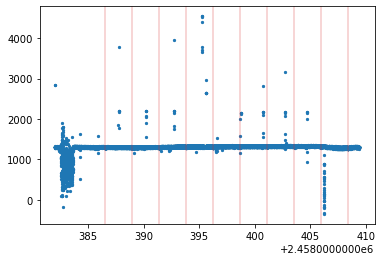

In [72]:
plt.figure()
plt.scatter(time_bjd, optimal_aperture_flux, s=5)

for ii in range(0,10):
    plt.axvline(2458386.578118+ii*2.423823, c="C3", alpha=0.25)

#we're tracing lines at epoch+multiples of the period
#this is just to highlight the cadence of transits

plt.show()

In [73]:
# now we're going to remove outliers and identify the transits

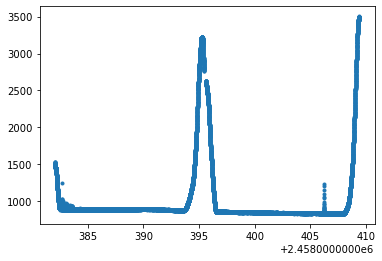

In [74]:
background_fluxes = tpf_data["FLUX_BKG"]
background_fluxes_err = tpf_data["FLUX_BKG_ERR"]

background_aperture_flux = np.empty(n_cadence)
background_aperture_flux_err = np.empty(n_cadence)

for ii in range(n_cadence):
    background_aperture_flux[ii], background_aperture_flux_err[ii] = aperture_phot(background_fluxes[ii,:,:], background_fluxes_err[ii,:,:], ap_want)
    
plt.figure(figsize=(6,4))
plt.plot(time_bjd, background_aperture_flux, ".")
plt.show()

In [75]:
# every dataset has its own background field
# here we see a change in time. For instance, this may happen if the planet has a very eccentric orbit, thus 
# approaching and getting away from the observer. This changes the effect of the atmosphere

In [76]:
# now we remove flagged data (somehow damaged, related to the instrument)
# check https://heasarc.gsfc.nasa.gov/docs/tess/documentation.html

Bit Value FFI Description
1 1 Y Attitude Tweak
2 2 N Safe Mode
3 4 Y Spacecraft is in Coarse Point
4 8 N Spacecraft is in Earth Point
5 16 Y Argabrightening event
6 32 Y Reaction Wheel desaturation Event
7 64 N Cosmic Ray in Optimal Aperture pixel
8 128 N Manual Exclude. The cadence was excluded because of an anomaly.
9 256 N Discontinuity corrected between this cadence and the following one.
10 512 N Impulsive outlier removed before cotrending.
11 1024 Y Cosmic ray detected on collateral pixel row or column.
12 2048 Y Straylight from Earth or Moon in camera FOV (predicted).
13 4096 N Scattered Light Exclude (spoc-4.0.5 and later).

In [77]:
bit_to_be_checked = [1,2,3,4,5,6,8,10,12,13]
value = 0 

for v in bit_to_be_checked:
    value += 2**(v-1)
    
print(value)

#1101010111111
np.binary_repr(value)
#now this number has digit 1 if the bit is inluded in the above list, 0 if not
# this will work as a mask

6847


'1101010111111'

In [78]:
# we're now going to  use the QUALITY of the dataset, which is just a scalar

quality = tpf_data["QUALITY"]

quality[:10]

array([152, 144, 128, 128, 128, 128, 128, 128, 128, 128])

In [79]:
# comparing the binary numbers bit by bit

#for instance
print(quality[0])
print(np.binary_repr(quality[0]))
print(np.binary_repr(value))

#     10011000
#1101010111111


bad_data = np.bitwise_and(quality, value)
print(bad_data[:10])
bad_selection = (bad_data > 0)
print(bad_selection[:10])

good_selection = (bad_data == 0)
print(good_selection[:10])

152
10011000
1101010111111
[152 144 128 128 128 128 128 128 128 128]
[ True  True  True  True  True  True  True  True  True  True]
[False False False False False False False False False False]


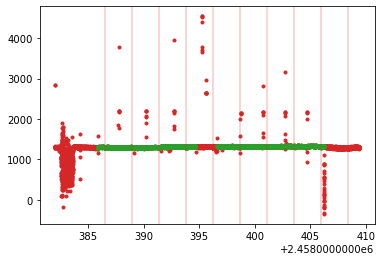

In [80]:
plt.figure(figsize=(6,4))
plt.plot(time_bjd, optimal_aperture_flux, ".", c="C3")
plt.plot(time_bjd[good_selection], optimal_aperture_flux[good_selection], ".", c="C2")

for ii in range(0,10):
    plt.axvline(2458386.578118+ii*2.423823, c="C3", alpha=0.25)
    
plt.show()

In [81]:
fileout = open("WASP44_optimal_aperture.dat", "w")

not_nan_sel = ~np.isnan(optimal_aperture_flux)
print(not_nan_sel)

[ True  True  True ...  True  True  True]


In [82]:
final_selection = good_selection & not_nan_sel
print(final_selection)

for b, v, e in zip(time_bjd[final_selection], optimal_aperture_flux[final_selection], optimal_aperture_flux_err[final_selection]):
    fileout.write("{0:16f} {1:16f} {2:16f}\n".format(b,v,e))

fileout.close()

[False False False ... False False False]


In [83]:
# we're now opening the aperture photometry file, already performed by the TESS team

In [84]:
#sector3_lc=ale_ubuntu_path + "/tess2018263035959-s0003-0000000012862099-0123-s_lc.fits"
sector3_lc = "../../MAST/tess2018263035959-s0003-0000000012862099-0123-s_lc.fits"

In [85]:
fits.info(sector3_lc)

Filename: ../MAST/tess2018263035959-s0003-0000000012862099-0123-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19692R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [86]:
lchdu = fits.open(sector3_lc)
lchdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [87]:
# SAP = simple aperture photometry, meaning the same thing we did manually on the data
# PDCSAP is SAP after correcting for the instrument systematics (via research data conditioning)
# we're going to use both of them, flatten both lightcurves and finally see with our eyes if the correction 
# was necesary or not

In [88]:
lcu_data = lchdu[1].data
print(lcu_data)

[(1382.04024484, 0.00566113, 111297,       nan,      nan,       nan,       nan, nan, nan, 152, nan, nan, nan, nan,           nan,        nan,           nan,        nan, nan, nan)
 (1382.04163374, 0.00566114, 111298,       nan,      nan,       nan,       nan, nan, nan, 144, nan, nan, nan, nan,           nan,        nan,           nan,        nan, nan, nan)
 (1382.04302264, 0.00566115, 111299, 1299.9954, 6.556884, 1536.4954, 2.7421794, nan, nan, 128, nan, nan, nan, nan, 2061.32853436, 0.00308527, 1194.08095933, 0.00340514, nan, nan)
 ...
 (1409.38547555, 0.00506957, 130986, 1297.4105, 8.522649, 3498.2432, 3.901426 , nan, nan, 128, nan, nan, nan, nan, 2061.41782462, 0.00409209, 1193.90680517, 0.00442897, nan, nan)
 (1409.38686438, 0.00506952, 130987, 1297.5286, 8.520175, 3494.8215, 3.9030259, nan, nan, 128, nan, nan, nan, nan, 2061.41962615, 0.00409219, 1193.91541558, 0.00442653, nan, nan)
 (1409.38825322, 0.00506947, 130988, 1255.7812, 8.493889, 3498.7412, 3.8991983, nan, nan, 132, nan, 

In [89]:
time_bjd = lcu_data["TIME"]
lcu_head = lchdu[1].header
bjd_ref = lcu_head["BJDREFI"] + lcu_head["BJDREFF"]

print(time_bjd)
print(bjd_ref)

time_bjd = lcu_data["TIME"] + bjd_ref

[1382.04024484 1382.04163374 1382.04302264 ... 1409.38547555 1409.38686438
 1409.38825322]
2457000.0


In [90]:
np.shape(time_bjd)

(19692,)

In [91]:
sap_flux = lcu_data["SAP_FLUX"]
sap_flux_err = lcu_data["SAP_FLUX_ERR"]

pdcsap_flux = lcu_data["PDCSAP_FLUX"]
pdcsap_flux_err = lcu_data["PDCSAP_FLUX_ERR"]

# we immediately perform the quality selection we did before

quality = lcu_data["QUALITY"]

bit_to_be_checked = [1,2,3,4,5,6,8,10,12,13]
value = 0 

for v in bit_to_be_checked:
    value += 2**(v-1)
    
print(value)
np.binary_repr(value)


bad_data = np.bitwise_and(quality, value)
print(bad_data[:10])
bad_selection = (bad_data > 0)
print(bad_selection[:10])

good_selection = (bad_data == 0)
print(good_selection[:10])

not_nan_sel = (~np.isnan(pdcsap_flux)) & (~np.isnan(sap_flux))
print(not_nan_sel)

final_selection = good_selection & not_nan_sel

6847
[152 144 128 128 128 128 128 128 128 128]
[ True  True  True  True  True  True  True  True  True  True]
[False False False False False False False False False False]
[False False False ... False False False]


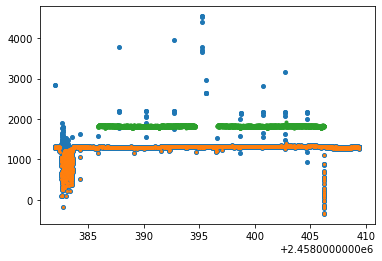

In [92]:
plt.figure(figsize=(6,4))
plt.plot(time_bjd, optimal_aperture_flux, ".", c= "C0", ms=8)
plt.plot(time_bjd, sap_flux, ".", c= "C1", ms=4)
plt.plot(time_bjd, pdcsap_flux, ".", c="C2")

plt.show()

In [93]:
# see how orange and blue points are most overlapping: it menas that our sap is the same as the  one
# provided by the TESS team

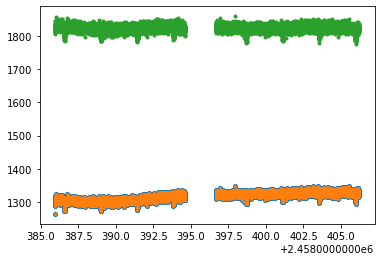

In [94]:
plt.figure(figsize=(6,4))
plt.plot(time_bjd[final_selection], optimal_aperture_flux[final_selection], ".", c= "C0", ms=8)
plt.plot(time_bjd[final_selection], sap_flux[final_selection], ".", c= "C1", ms=4)
plt.plot(time_bjd[final_selection], pdcsap_flux[final_selection], ".", c="C2")

plt.show()

In [95]:
fileout = open("WASP44_SAP_flux.dat", "w")

for b, v, e in zip(time_bjd[final_selection], sap_flux[final_selection], sap_flux_err[final_selection]):
    fileout.write("{0:16f} {1:16f} {2:16f}\n".format(b,v,e))

fileout.close()

In [96]:
fileout = open("WASP44_PDCSAP_flux.dat", "w")

for b, v, e in zip(time_bjd[final_selection], pdcsap_flux[final_selection], pdcsap_flux_err[final_selection]):
    fileout.write("{0:16f} {1:16f} {2:16f}\n".format(b,v,e))

fileout.close()